<a href="https://colab.research.google.com/github/privindofdn/Praktikum-4-Kecerdasan-Buatan/blob/main/Prak4_G211220081.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
# mengganti 'plot_roc_curve' versi lama menjadi 'RocCurveDisplay' versi terbaru
# mengganti 'plot_confusion_matrix' versi lama menjadi 'ConfusionMatrixDisplay' versi terbaru
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

In [3]:
! gdown 1zgX2MgGSw31LW6DT6B6mcrU-AfnuzQbv

Downloading...
From: https://drive.google.com/uc?id=1zgX2MgGSw31LW6DT6B6mcrU-AfnuzQbv
To: /content/creditcard.csv
100% 151M/151M [00:00<00:00, 177MB/s]


In [4]:
# Read the dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Printing quick information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking mising values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# indentify duplicate values and mark all the duplicates as true
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [8]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# drop data duplicated
df = df.drop_duplicates(keep='first')

In [9]:
# Check the distribution of the credit card fraud cases
class_proportion = df['Class'].value_counts()
class_proportion

0    283253
1       473
Name: Class, dtype: int64

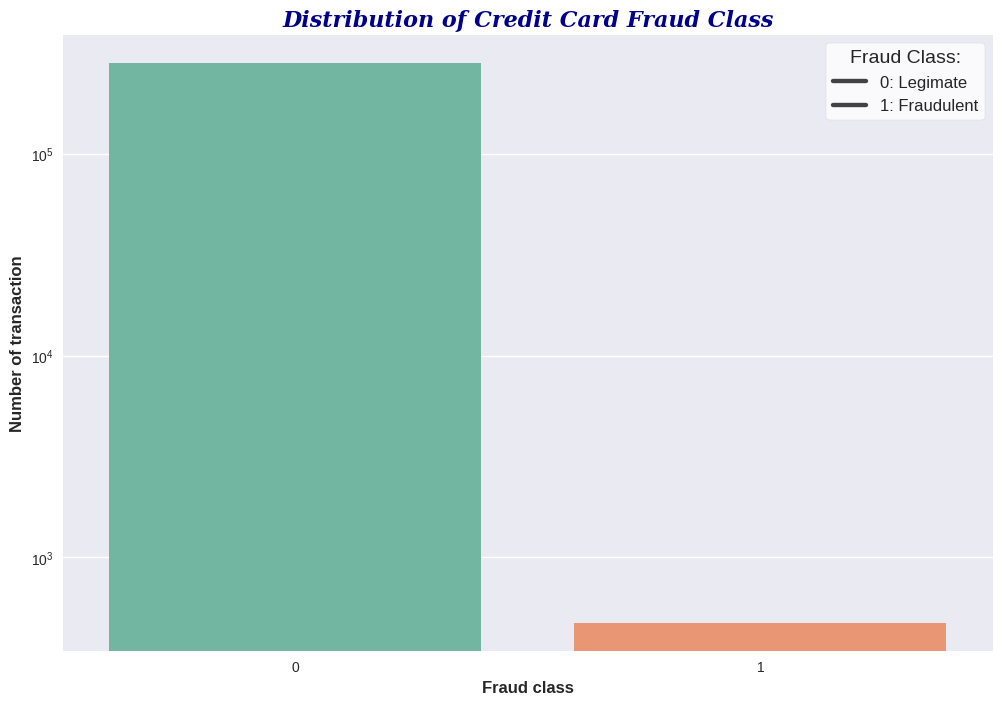

In [10]:
# Plotting a barchart to see the the distribution of the credit card fraud cases
plt.style.use('seaborn')
font1 = {'family': 'serif',
         'fontstyle': 'italic',
         'fontsize': 16,
         'fontweight': 'bold',
         'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}
font3 = {'weight': 'normal','size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=class_proportion.index, y=class_proportion.values, palette='Set2')
ax.set_title('Distribution of Credit Card Fraud Class', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Number of transaction', fontdict=font2)
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels=['0: Legimate', '1: Fraudulent'], prop= font3,
          title = 'Fraud Class:', title_fontsize=14,
          frameon=True, facecolor='white')
plt.show()

In [11]:
# Check the proportion of the fraud cases and identify the imbalance
df['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [12]:
# Arange the dataset into features matrix and target vector
# Drop the 'Time variable as it does not that much help our analysis
X = df.drop(columns=(['Time', 'Class']))
y = df['Class']

In [13]:
# Makena SMOTE instance, then fit and apply it in one step
# to create an oversampled version of our dataset.

sm = SMOTE(sampling_strategy='auto', random_state=3, k_neighbors=5)
X_oversampled , y_oversampled = sm.fit_resample(X, y)

In [14]:
# Summarize the fraud class distribution of the new SMOTE-transformed dataset
unique_originial, counts_original = np.unique(y, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original fraud class distribution:', dict(zip(unique_originial, counts_original)))
print('New transformed fraud class distribution:', dict(zip(unique_oversampled, counts_oversampled)))


Original fraud class distribution: {0: 283253, 1: 473}
New transformed fraud class distribution: {0: 283253, 1: 283253}


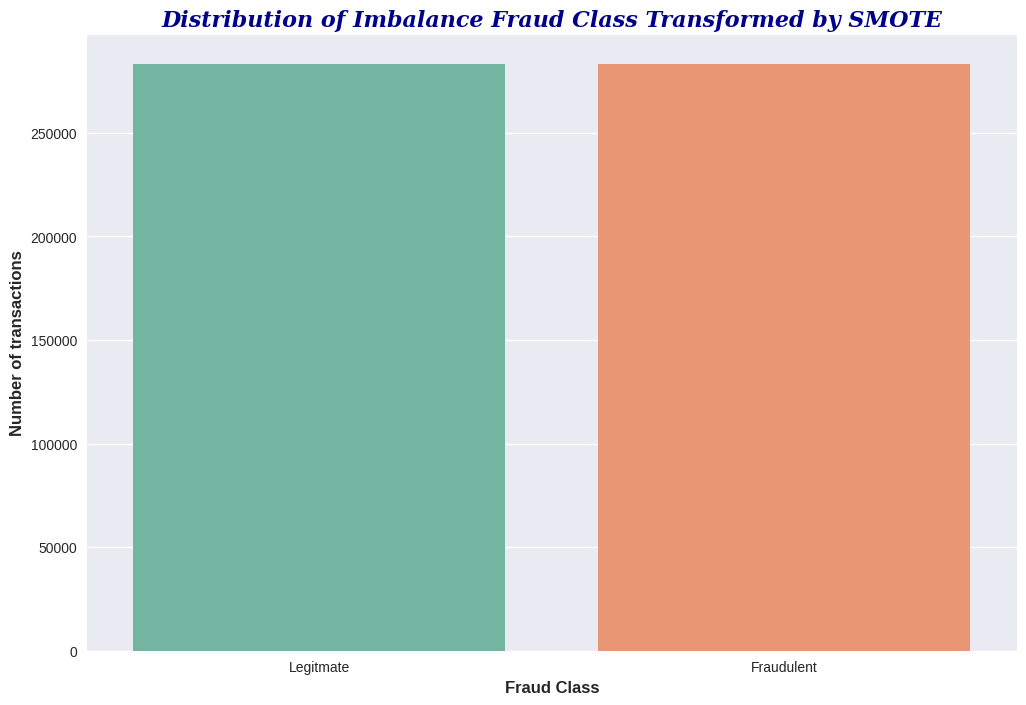

In [15]:
# Visualize the SMOTE-transformed target variable
plt.style.use('seaborn')
font1 = {'family': 'serif',
         'fontstyle': 'italic',
         'fontsize': '16',
         'fontweight': 'bold',
         'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=y_oversampled, palette='Set2', ax=ax) # menambahkan x=
ax.set_title('Distribution of Imbalance Fraud Class Transformed by SMOTE', fontdict=font1)
ax.set_xlabel('Fraud Class', fontdict=font2)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Legitmate', 'Fraudulent'])
ax.set_ylabel('Number of transactions', fontdict=font2)
plt.show()

In [16]:
# Separate the transformed features matrix and target vector into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)

In [17]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [18]:
# Model Evalution -classification accuracy
training_rfc_accuracy = rfc.score(X_train, y_train)
testing_rfc_accuracy = rfc.score(X_test, y_test)

print("Training RFC Accuracy:", training_rfc_accuracy)
print("Testing RFC Accuracy:", testing_rfc_accuracy)

Training RFC Accuracy: 1.0
Testing RFC Accuracy: 0.9998587839889287


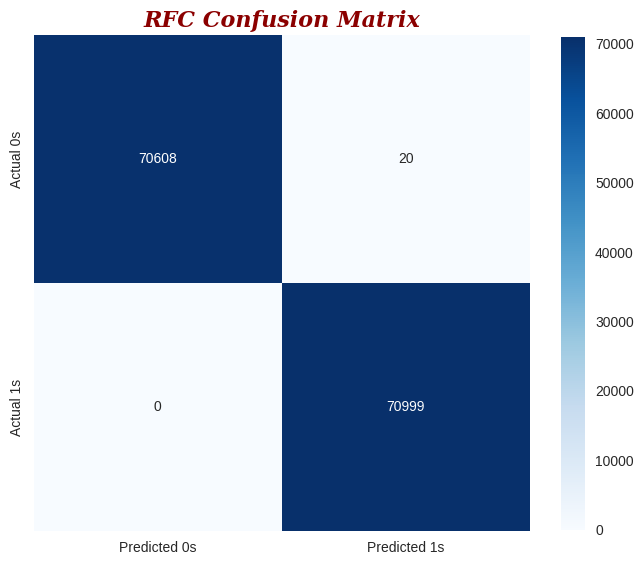

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
font1 = {'family': 'serif',
         'fontstyle': 'italic',
         'fontsize': '16',
         'fontweight': 'bold',
         'color': 'DarkRed'}
font2 = {'weight': 'bold', 'size': 12}

sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)),
            cmap = 'Blues',
            square =True,
            annot =True,
            fmt ='d',
            cbar_kws={'shrink': 0.8},
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s','Actual 1s'])
ax.set_title('RFC Confusion Matrix', fontdict=font1)
plt.show()

In [20]:
# Model evaluation - Sensitivity, Specificity and Precision

TN, FP, FN, TP = confusion_matrix(y_test, rfc.predict(X_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 70608
False Positives: 20
False Negatives: 0
True Positives: 70999

Sensitivity: 1.0
Specificity: 0.9997168261879141
Precision: 0.9997183852208564


In [21]:
# Check the predicted probabilities for every observation in the data subset
# Note that the default classification threshold is 0.5

testing_probabilities= rfc.predict_proba(X_test)
testing_probabilities

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [1.        , 0.        ],
       [0.99333333, 0.00666667],
       [0.        , 1.        ]])

In [22]:
# Convert the testing probabilities into a dataframe
testing_probabilities_df = pd.DataFrame(testing_probabilities, columns=['1 - p(X_test)', 'p(X_test)'])
testing_probabilities_df.head()

,1 - p(X_test),p(X_test)
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [23]:
# Get predictions
rfc.predict(X_test)

array([1, 1, 1, ..., 0, 0, 1])

In [24]:
# Model evaluation -AUC
# Calculate AUC for both training and testing subsets
# Only probabilities being in the positive class is need for the calculation, that is the seconnd column
training_rfc_AUC = roc_auc_score(y_train, rfc.predict_proba(X_train)[:, 1])
testing_rfc_AUC = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

print("Training RFC AUC:", training_rfc_AUC)
print("Testing RFC AUC:", testing_rfc_AUC)

Training RFC AUC: 1.0
Testing RFC AUC: 0.9999917379885388


In [25]:
# Separate the transformed features matrix and target vector into random train and test subtest
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)

In [26]:
# define dictionary of hyperparameters
params = {'penalty': ['l1', 'l2'],
          'C':[0.0001, 0.001, 0.01, 10, 50, 100],
          'class_weight': [None, 'balanced']}

In [27]:
# Instantiate Logistic regresion model. N.B: the default solver doesn't support l1 regularization
# Instantiate Grid Search to find the best hyperparameters and fit the model
lgr = LogisticRegression(solver='liblinear')
gs = GridSearchCV(lgr, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 10, 50, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [28]:
GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 10, 50, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 10, 50, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [29]:
# Model evalution - accuracy
training_lgr_accuracy = gs.score(X_train, y_train)
testing_lgr_accuracy = gs.score(X_test, y_test)

print("Training LGR Accuracy:", training_lgr_accuracy)
print("Testing LGR Accuracy:", testing_lgr_accuracy)

Training LGR Accuracy: 0.9586658789914305
Testing LGR Accuracy: 0.9577481694874564


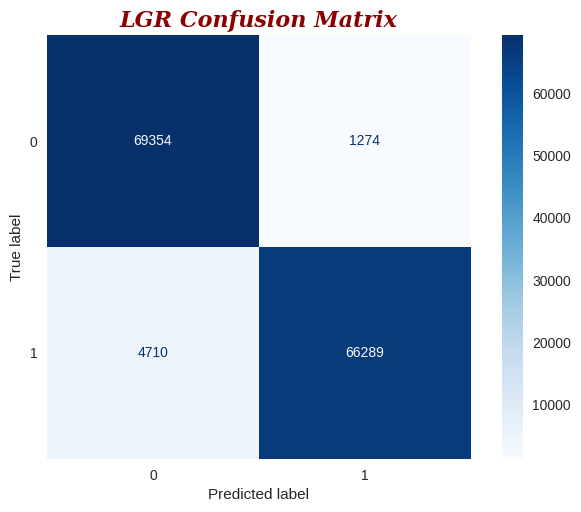

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plotting the confusion matrix
font1 = {'family': 'serif',
         'fontstyle': 'italic',
         'fontsize': 16,
         'fontweight': 'bold',
         'color': 'DarkRed'}

# ConfusionMatrixDisplay(gs, X_test, y_test, values_format='d')
cm = confusion_matrix(y_test, gs.predict(X_test))

# Buat instance ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Tampilkan confusion matrix dengan format nilai
disp.plot(cmap='Blues', values_format='d')
plt.title('LGR Confusion Matrix', fontdict=font1)
plt.grid(False)
plt.show()

In [31]:
# Model evalution - Sensitivity, Specifity and Precision

TN, FP, FN, TP = confusion_matrix(y_test, gs.predict(X_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 69354
False Positives: 1274
False Negatives: 4710
True Positives: 66289

Sensitivity: 0.9336610374794011
Specificity: 0.9819618281701308
Precision: 0.9811435253023104


In [32]:
# Model evaluation -AUC
# Calculate AUC for both training and testing subsets
# Only probabilities being in the positive class is need for the calculation, that is the seconnd column
training_lgr_AUC = roc_auc_score(y_train, gs.predict_proba(X_train)[:, 1])
testing_lgr_AUC = roc_auc_score(y_test, gs.predict_proba(X_test)[:, 1])

print("Training LGR AUC:", training_lgr_AUC)
print("Testing LGR AUC:", testing_lgr_AUC)

Training LGR AUC: 0.991869895733001
Testing LGR AUC: 0.991585213218003
